# Sales Data Analysis Project

## Objective

Analyze sales performance to identify trends, growth patterns, and top-performing agents using Python.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt




## Data Loading & Inspection
In this step, we load the dataset and inspect its structure.


In [7]:
df = pd.read_csv("Python.csv")
df.head()

# --- Anonymize Salesman names ---
df["SalesMan"] = (
    "Salesman_" +
    df["SalesMan"].astype("category").cat.codes.astype(str)
)

In [8]:
df.shape

(27143, 14)

In [9]:
df.columns

Index(['Month', 'Agency Name', 'Agency Id', 'SalesMan', 'State Head',
       'Regional Head', 'National Head', 'State Name', 'City Name',
       'Transaction Cnt', 'Ticket Count', 'Total Sales', 'LCC', 'FSC'],
      dtype='object')

## Monthly Sales Trend Analysis
We analyze monthly performance and calculate growth percentages to understand trends.


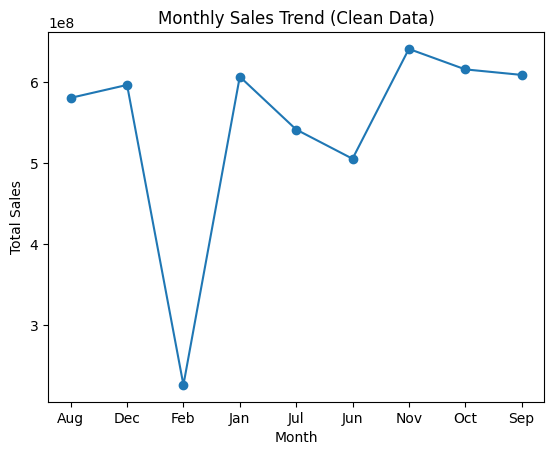

In [10]:
monthly_sales = df.groupby("Month", observed=True)["Total Sales"].sum().sort_index()

monthly_sales.plot(marker="o")
plt.title("Monthly Sales Trend (Clean Data)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [11]:
growth = monthly_sales.pct_change() * 100
growth


Month
Aug           NaN
Dec      2.751422
Feb    -62.113716
Jan    168.463114
Jul    -10.756658
Jun     -6.672808
Nov     26.847154
Oct     -3.942096
Sep     -1.109063
Name: Total Sales, dtype: float64

Sales dropped sharply in February (-62%) but recovered strongly in June (+123%).
- From July to November, sales showed steady growth between 1–7%.
- December saw a slight decline (-6.9%), indicating seasonal variation.

## State Wise Perfomance

In [12]:
top_statename = (
    df.groupby("State Name")["Total Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_statename


State Name
Karnataka         7.096272e+08
Delhi             6.659927e+08
West Bengal       4.890372e+08
Gujarat           4.479289e+08
Haryana           3.763416e+08
Punjab            2.524646e+08
Maharashtra       2.360159e+08
Andhra Pradesh    2.085878e+08
Telangana         2.009547e+08
Tamil Nadu        1.731170e+08
Name: Total Sales, dtype: float64

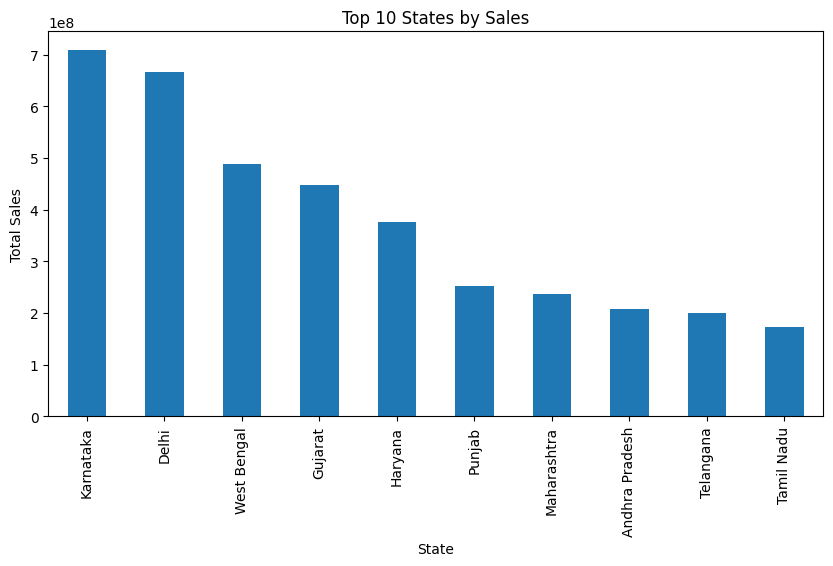

In [13]:
top_statename.plot(kind="bar", figsize=(10,5))

plt.title("Top 10 States by Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")

plt.show()


## Key Insights

- Sales recovered strongly after February decline.
- Karnataka and Delhi are top revenue states.
- Sales growth stabilized in the second half of the year.
- Performance varies significantly across regions.
